In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pathlib
import matplotlib.pyplot as plt

In [ ]:
import os
import zipfile

local_zip = '/content/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
local_zip = '/content/val.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
local_zip = '/content/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

['orange', 'cookies', 'yogurt', 'chips', 'apple', 'banana']
orange
cookies
yogurt
chips
apple
banana


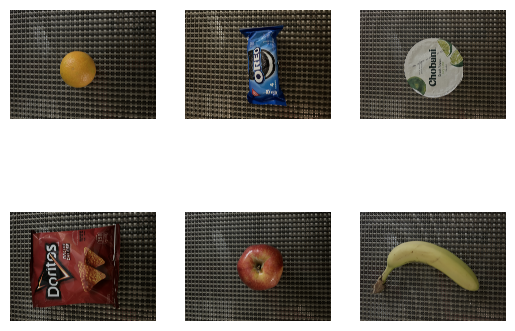

In [ ]:
from PIL import Image

availClasses = os.listdir("/content/train")
print(availClasses)

for i in range(len(availClasses)):
 currClass = availClasses[i]
 print(currClass)
 plt.subplot(2, 3, i+1)
 imgPath = "/content/train/" + currClass + "/" + currClass + "1.JPG"
 img = Image.open(imgPath)
 plt.imshow(img)
 plt.axis("off")


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_directory = '/content/train'
val_directory = '/content/val'
test_directory = '/content/test'

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    val_directory,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 332 images belonging to 6 classes.
Found 74 images belonging to 6 classes.


In [ ]:
%load_ext tensorboard

In [ ]:
from tensorflow.keras.applications import MobileNetV2

baseModel = MobileNetV2(weights = "imagenet", include_top = False, alpha = 0.35,
                   input_shape = (224, 224, 3))

baseModel.trainable = False
modelUpdated = tf.keras.models.Sequential()
modelUpdated.add(baseModel)
modelUpdated.add(layers.GlobalAveragePooling2D())
modelUpdated.add(layers.Dropout(0.2))
modelUpdated.add(layers.Dense(128, activation="relu"))
modelUpdated.add(layers.Dense(6, activation = "softmax"))

2019640/2019640 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
modelUpdated.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_0.35_224 (Functional)    │ (None, 7, 7, 1280)          │         410,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 574,950 (2.19 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 410,208 (1.56 MB)

In [ ]:
modelUpdated.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history = modelUpdated.fit(train_generator,
                    epochs = 20,
                    verbose = 1,
                    validation_data = validation_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.3855 - loss: 1.6301 - val_accuracy: 0.8108 - val_loss: 0.5458
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.9036 - loss: 0.4560 - val_accuracy: 0.8378 - val_loss: 0.3080
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9349 - loss: 0.2279 - val_accuracy: 0.9595 - val_loss: 0.1219
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.9794 - loss: 0.0916 - val_accuracy: 0.8784 - val_loss: 0.2306
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 94s 5s/step - accuracy: 0.9754 - loss: 0.0772 - val_accuracy: 0.9865 - val_loss: 0.0761
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.9915 - loss: 0.0429 - val_accuracy: 1.0000 - val_loss: 0.0570
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.9950 - loss: 0.0403 - val_accuracy: 0.9054 - val_loss: 0.1216
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.9888 - loss: 0.0387 - val_accuracy: 1.0000 - val_loss: 0.0288
Epoch 9/20
6/6 ━━━━

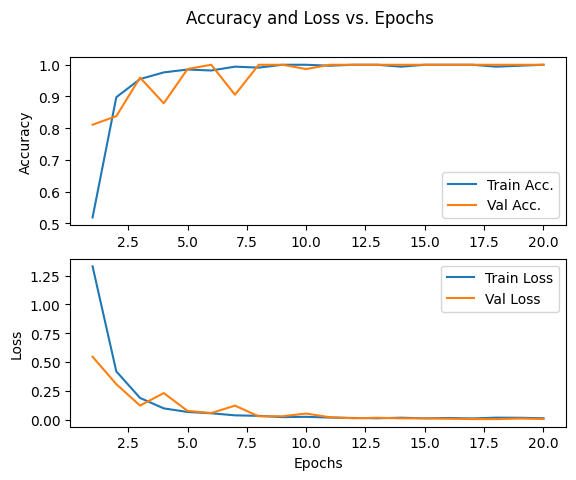

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('Accuracy and Loss vs. Epochs')
trainList = history.history['accuracy']
valList = history.history['val_accuracy']
trainLoss = history.history['loss']
valLoss = history.history['val_loss']
epochList = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

axs[0].plot(epochList, trainList, label = 'Train Acc.')
axs[0].plot(epochList, valList, label = 'Val Acc.')
axs[0].set_ylabel("Accuracy")

axs[1].plot(epochList, trainLoss, label = 'Train Loss')
axs[1].plot(epochList, valLoss, label = 'Val Loss')
axs[1].set_ylabel("Loss")

axs[1].set_xlabel("Epochs")
axs[0].legend()
axs[1].legend()

plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical'
)

modelUpdated.evaluate(test_generator)

Found 74 images belonging to 6 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 1.0000 - loss: 0.0025


[0.002489860402420163, 1.0]

In [ ]:
files = test_generator.filenames
predictions = modelUpdated.predict(test_generator)
predictedClasses = []
labels = ["apple", "banana", "chips", "cookies", "orange", "yogurt"]

#apple = 4
for i in range(len(predictions)):
  pred = predictions[i]
  predIndex = np.argmax(pred)
  label = labels[predIndex]
  predictedClasses.append(label)

print(files)
print(predictions)
print(labels)


2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step
['apple/apple53.JPG', 'apple/apple54.JPG', 'apple/apple55.JPG', 'apple/apple56.JPG', 'apple/apple57.JPG', 'apple/apple58.JPG', 'apple/apple59.JPG', 'apple/apple60.JPG', 'apple/apple77.JPG', 'apple/apple78.JPG', 'apple/apple79.JPG', 'apple/apple80.JPG', 'banana/banana57.JPG', 'banana/banana58.JPG', 'banana/banana59.JPG', 'banana/banana60.JPG', 'banana/banana61.JPG', 'banana/banana62.JPG', 'banana/banana63.JPG', 'banana/banana64.JPG', 'banana/banana65.JPG', 'banana/banana66.JPG', 'banana/banana67.JPG', 'banana/banana68.JPG', 'chips/chips15.JPG', 'chips/chips23.JPG', 'chips/chips27.JPG', 'chips/chips38.JPG', 'chips/chips4.JPG', 'chips/chips46.JPG', 'chips/chips53.JPG', 'chips/chips61.JPG', 'chips/chips65.JPG', 'chips/chips66.JPG', 'chips/chips76.JPG', 'chips/chips78.JPG', 'cookies/cookies16.JPG', 'cookies/cookies18.JPG', 'cookies/cookies23.JPG', 'cookies/cookies26.JPG', 'cookies/cookies44.JPG', 'cookies/cookies47.JPG', 'cookies/cookies52.JPG', 'cookies

In [ ]:
print(predictedClasses)

['chips', 'cookies', 'orange', 'chips', 'cookies', 'chips', 'yogurt', 'apple', 'cookies', 'banana', 'orange', 'yogurt', 'yogurt', 'banana', 'yogurt', 'yogurt', 'apple', 'orange', 'orange', 'banana', 'chips', 'orange', 'cookies', 'orange', 'yogurt', 'chips', 'apple', 'apple', 'chips', 'yogurt', 'yogurt', 'orange', 'banana', 'apple', 'yogurt', 'cookies', 'apple', 'apple', 'apple', 'orange', 'cookies', 'chips', 'cookies', 'orange', 'chips', 'apple', 'orange', 'apple', 'chips', 'yogurt', 'yogurt', 'banana', 'apple', 'chips', 'cookies', 'banana', 'yogurt', 'yogurt', 'banana', 'yogurt', 'banana', 'banana', 'cookies', 'cookies', 'banana', 'chips', 'orange', 'orange', 'apple', 'chips', 'banana', 'banana', 'cookies', 'cookies']


In [ ]:
import glob
from tensorflow import keras

direct = 'content'
SAVED_MODEL_FILENAME = os.path.join(direct, "finalFoodClassifier.tflite")
FLOAT_TFL_MODEL_FILENAME = os.path.join(direct, "finalFoodFloat.tflite")
QUANTIZED_TFL_MODEL_FILENAME = os.path.join(direct, "finalFoodQuant.tflite")
TFL_CC_MODEL_FILENAME = os.path.join(direct, "finalFoodClassifier.cc")

modelUpdated.export(SAVED_MODEL_FILENAME)

converter = tf.lite.TFLiteConverter.from_saved_model(SAVED_MODEL_FILENAME)
tfliteModelNoQuant = converter.convert()
open(FLOAT_TFL_MODEL_FILENAME, "wb").write(tfliteModelNoQuant)

def representative_dataset():
  for filename in glob.glob(test_directory + "/*/*.JPG"):
    img = keras.preprocessing.image.load_img(filename, target_size=(224,224))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    yield([img_array])

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

converter.representative_dataset = representative_dataset
model_tflite = converter.convert()

open(QUANTIZED_TFL_MODEL_FILENAME, "wb").write(model_tflite)

Saved artifact at 'content/finalFoodClassifier.tflite'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  136739247774480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136739071367776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136739071365136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136739071367424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136739071369712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136739071377104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136739070685984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136739071372528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136739071374288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136738988032064: TensorSpec(shape=(), dtype=tf.resource, name=

790160

In [ ]:
def get_dir_size(dir):
  size = 0
  for f in os.scandir(dir):
    if f.is_file():
      size += f.stat().st_size
    elif f.is_dir():
      size += get_dir_size(f.path)
  return size

size_tf = get_dir_size(SAVED_MODEL_FILENAME)
sizeWithoutQuant = os.path.getsize(FLOAT_TFL_MODEL_FILENAME)
sizeQuant = os.path.getsize(QUANTIZED_TFL_MODEL_FILENAME)

print(size_tf)
print(sizeWithoutQuant)
print(sizeQuant)

6348301
2253156
790160


In [ ]:
!xxd -i {QUANTIZED_TFL_MODEL_FILENAME} > {TFL_CC_MODEL_FILENAME}
REPLACE_TEXT = QUANTIZED_TFL_MODEL_FILENAME.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_image_classifier_model_data/g' {TFL_CC_MODEL_FILENAME}

!cat {TFL_CC_MODEL_FILENAME}

Streaming output truncated to the last 5000 lines.
  0x01, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x50, 0x01, 0x00, 0x00, 0x86, 0x17, 0xff, 0xff, 0x00, 0x00, 0x00, 0x01,
  0x14, 0x00, 0x00, 0x00, 0xe4, 0x0f, 0x00, 0x00, 0x12, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x02, 0xf0, 0x0f, 0x00, 0x00, 0xfc, 0x16, 0xff, 0xff,
  0x08, 0x00, 0x00, 0x00, 0x88, 0x0a, 0x00, 0x00, 0x50, 0x01, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00,